# Coeus AI
## Jupyter Notebook para realizar el pre-procesamiento de las imágenes.
### Imports

In [1]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image


from extras.preprocessing import *
from coeus import *

### Creando un sub-conjunto aleatorio de pruebas

In [3]:
def generate_dataset(path_to_transcripions):
    """
    Función que genera un diccionario de objetos Documento para cada uno
    de los elementos presentes en el archivo de transcripciones proporcionado.
    """
    # Se carga el archivo de transcripciones
    df = pd.read_csv(path_to_transcripions)
    
    # Se crea un diccionario para los documentos
    documentos = {}
    
    # Por cada archivo dentro del archivo de transcripciones
    for index in df.index:
        # Obteniendo el nombre del archivo
        filename = str(df['NombreArchivo'][index])
        
        # Se crea un documento temporal, que será añadido al diccionario
        temporal_doc = Documento(filename, 
                                 df['Conjunto'][index], 
                                 df['Texto'][index])

        # Agregando el documento al diccionario
        documentos[filename] = temporal_doc

    return documentos

def generate_random_test(dataset, N, conjunto, seed):
    """
    Función que genera un subconjunto aleatorio de N elementos a partir de un determinado 
    conjunto de 'dataset'.
    dataset es un diccionario de Documentos, se puede generar con generate_dataset.
    """
    # Se filtran los elementos segun 'conjunto'
    filtered_dict = dict(filter(lambda elem: elem[1].conjunto == conjunto, dataset.items()))
    
    # Se retornan N elementos aleatorios
    random.seed(seed)
    return dict(random.sample(filtered_dict.items(), N))

def datos_head(dataset, N):
    """
    Función que imprime N elementos (Documento) de un dataset. Para fines de 
    visualización.
    """
    for item in list(dataset.items())[:N]:
        print("Nombre del archivo:", item[1].nombre_archivo)
        print("Conjunto del archivo:", item[1].conjunto)
        print("Ruta:",item[1].get_ruta_archivo())
        print('-------------------------------------------------------------------')
    
dataset = generate_dataset("Datos/JusticIA_DatosTranscripciones.csv")
test_set = generate_random_test(dataset, 50, 'Fichas_manual', seed=1)
datos_head(test_set, 5)

Nombre del archivo: Ficheros_Detenidos_Desaparecidos_Cabanas_Fierro_Zacarias_76-12-07,_CABANAS_FIERRO_ZACARIAS-3-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_Detenidos_Desaparecidos_Cabanas_Fierro_Zacarias_76-12-07,_CABANAS_FIERRO_ZACARIAS-3-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-123-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-123-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_VARP_DFS,_Fichas_VARP_2_DFS_Fichas_VARP_2-32-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_VARP_DFS,_Fichas_VARP_2_DFS_Fichas_VARP_2-32-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_UAG_79-07-12_a_80-03-04_UAG,_fichas-131-.JPG
Conjunto del

### Funciones de pre-procesamiento

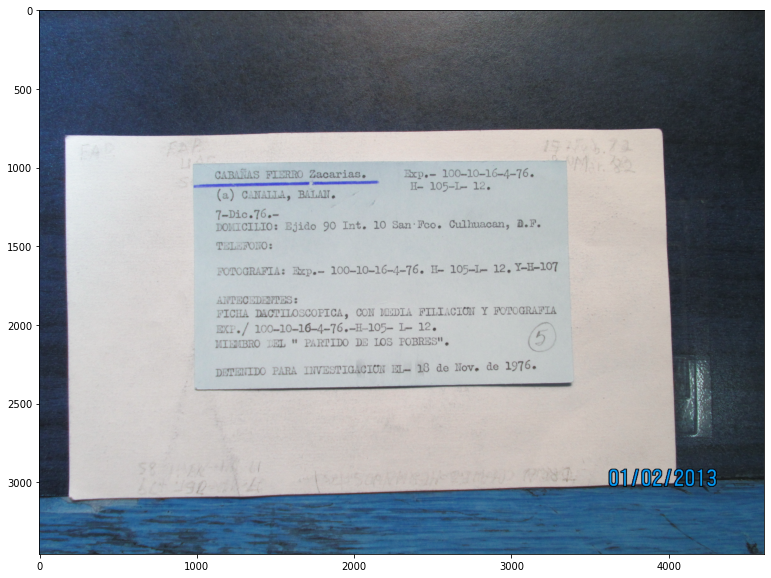

In [5]:
# Carga de imagen de prueba
sample = list(test_set.items())[0]
sample_path = os.path.join("Datos/", sample[1].get_ruta_archivo())

img = cv2.imread(os.path.join(sample_path))

plt.figure(figsize=(20,10))
plt.imshow(img)

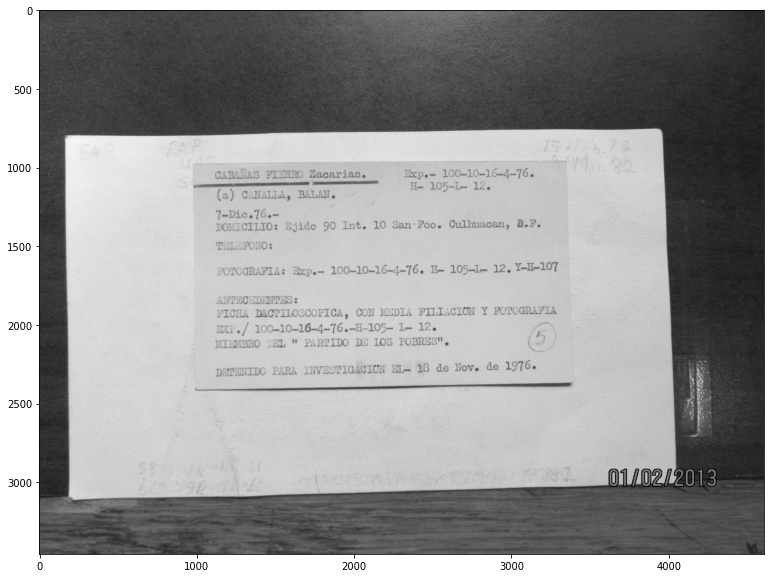

In [6]:
img = rgb_to_gray(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

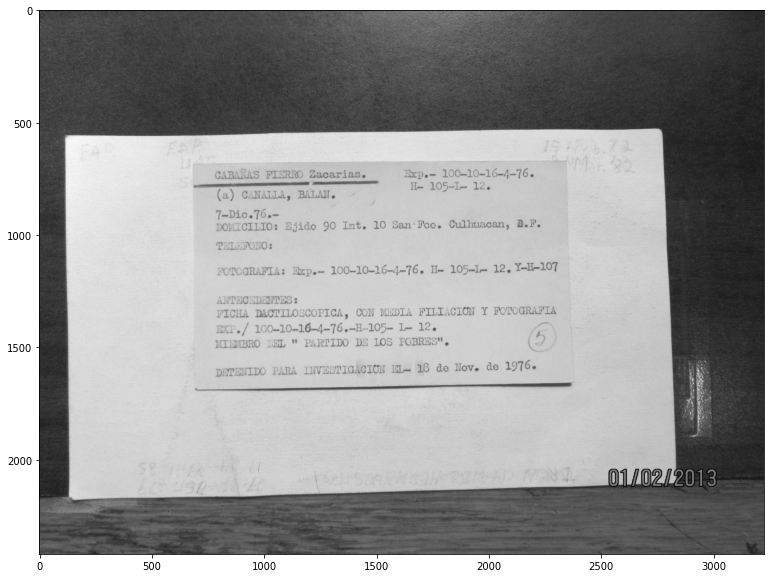

In [7]:
img = downscale_img(img, 0.7)
    
plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

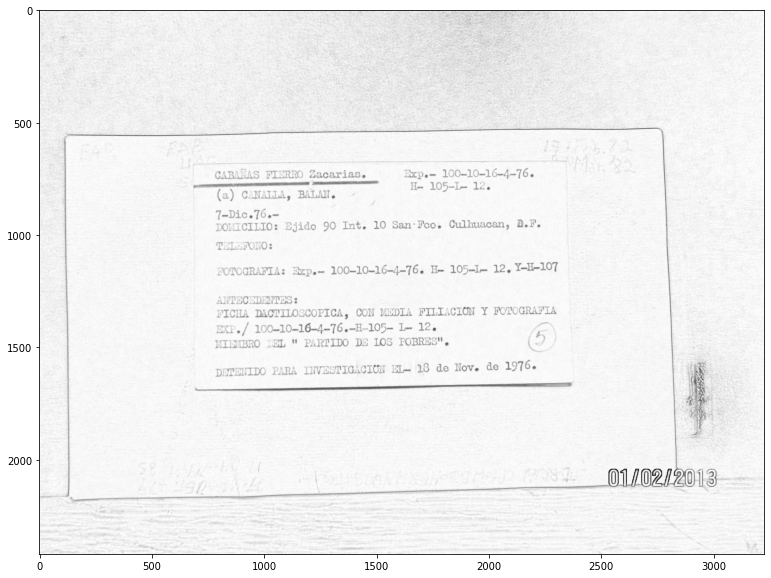

In [8]:
img = shadow_removal(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

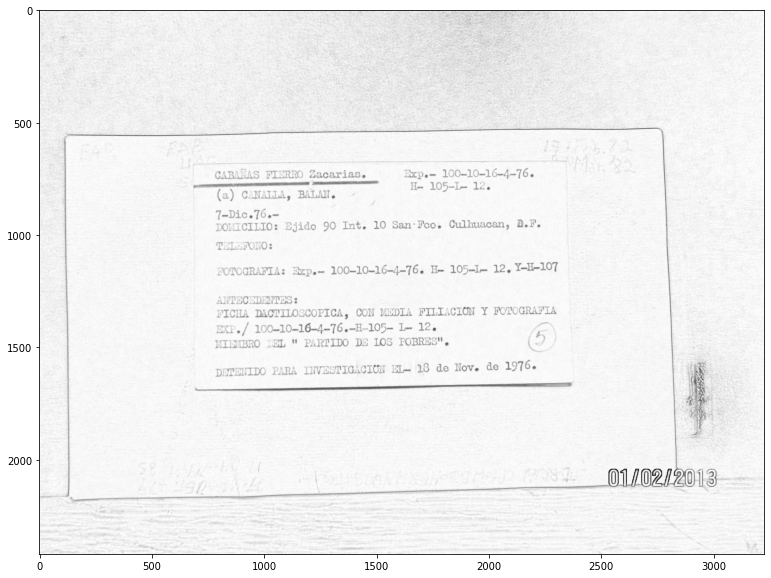

In [17]:
img = noise_removal(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

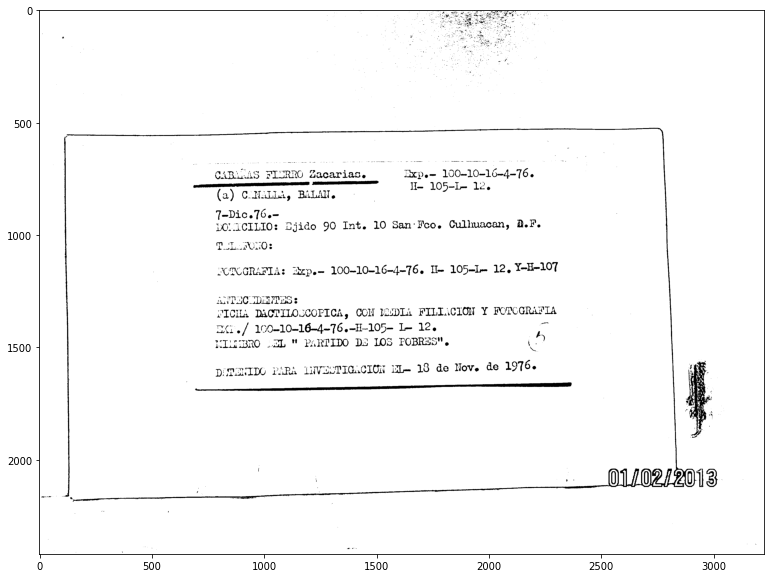

In [18]:
T, img_otsu = otsu_binarization(img)

img_otsu_inv = invert(img_otsu)

plt.figure(figsize=(20,10))
plt.imshow(img_otsu_inv, cmap='gray')

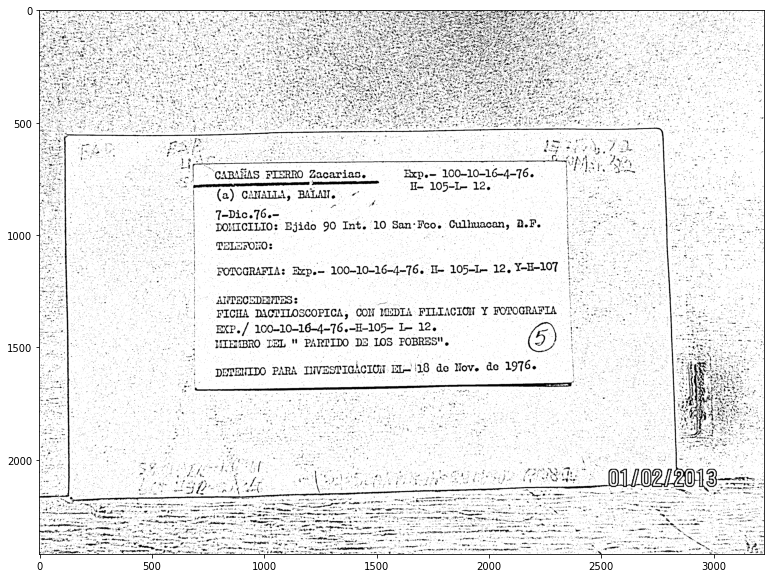

In [19]:
img_binaria = adaptive_binarization(img, 7)

img_binaria_invt = invert(img_binaria)

plt.figure(figsize=(20,10))
plt.imshow(img_binaria_invt, cmap='gray')

In [20]:
# Corrección de orientación con Tesseract
"""
img_rotada_tess = deskew_tesseract(sample_path)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_tess, cmap='gray')
"""

"\nimg_rotada_tess = deskew_tesseract(sample_path)\n\nplt.figure(figsize=(20,10))\nplt.imshow(img_rotada_tess, cmap='gray')\n"

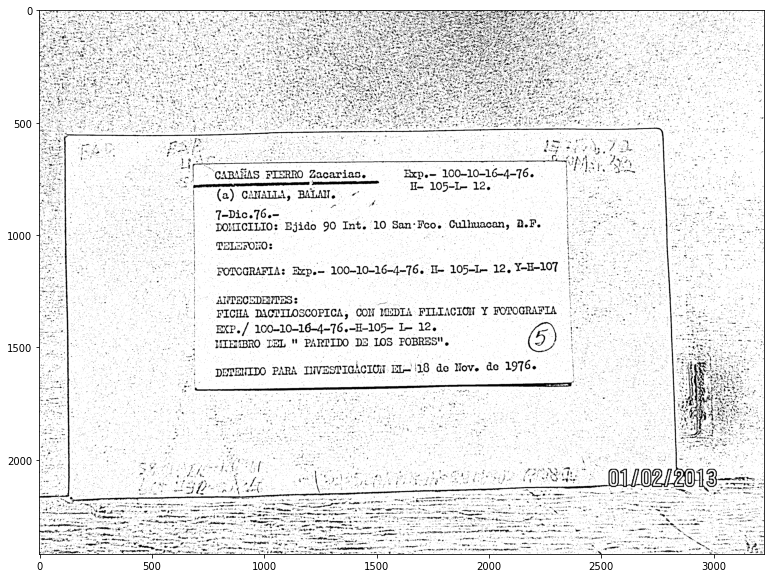

In [21]:
# Corrección de orientación con CV2
img_rotada_cv2 = deskew_cv2(img_binaria_invt)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_cv2, cmap='gray')

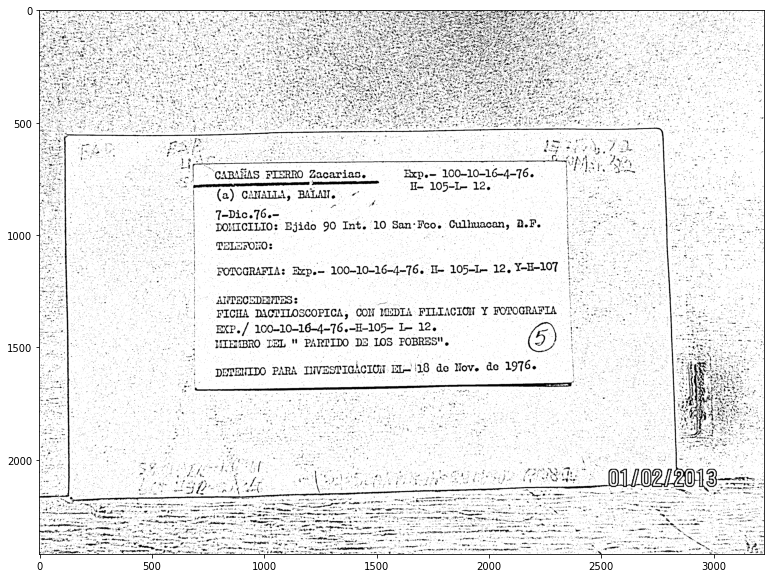

In [13]:
# Eliminación de los bordes
final_img = crop_image(img_rotada_cv2)

plt.figure(figsize=(20,10))
plt.imshow(final_img, cmap='gray')

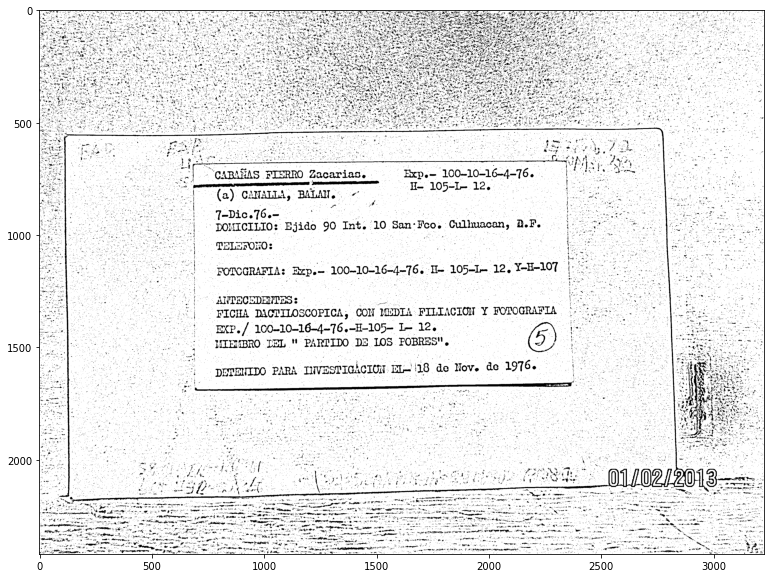

In [14]:
# Eliminación de los bordes
img_rotada_nb = remove_borders(final_img)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_nb, cmap='gray')

### Evaluación de la eficacia del pre-procesamiento sobre el conjunto de pruebas

In [ ]:
# Se copian los documentos de prueba a la carpeta Datos/Test
process_documents = False

if process_documents:
    from shutil import copyfile

    for i, Document in enumerate(test_set.items()):
        original_filepath = os.path.join("Datos/", Document[1].get_ruta_archivo())

        # Se carga la imagen original con cv2
        img = cv2.imread(os.path.join(original_filepath))

        # Se crea la estructura de carpetas
        if not os.path.exists("Datos/Test/"):
            os.mkdir("Datos/Test/")
        if not os.path.exists("Datos/Test/original/"):
            os.mkdir("Datos/Test/original/")
        if not os.path.exists("Datos/Test/procesados_adaptive/"):
            os.mkdir("Datos/Test/procesados_adaptive/")
        if not os.path.exists("Datos/Test/procesados_otsu/"):
            os.mkdir("Datos/Test/procesados_otsu/")
        if not os.path.exists("Datos/Test/procesados_adaptive_l/"):
            os.mkdir("Datos/Test/procesados_adaptive_l/")

        new_filepath = os.path.join("Datos/Test/original/", Document[1].nombre_archivo)

        # Si el archivo no ha sido copiado
        if not os.path.isfile(new_filepath):
            copyfile(original_filepath, new_filepath)

        # Generando documento con binarización Otsu
        img_otsu = preprocess(img, binarization='otsu', orientation='cv2')
        otsu_filepath = os.path.join("Datos/Test/procesados_otsu", Document[1].nombre_archivo)
        cv2.imwrite(otsu_filepath, img_otsu)

        # Generando documento con binarización adaptativa
        img_adaptive = preprocess(img, binarization='adaptive', orientation='cv2')
        adaptive_filepath = os.path.join("Datos/Test/procesados_adaptive", Document[1].nombre_archivo)
        cv2.imwrite(adaptive_filepath, img_adaptive)
        
        # Generando documento con binarización adaptativa menor
        img_adaptive_l = preprocess(img, binarization='adaptive', orientation='cv2', t=7)
        l_adaptive_filepath = os.path.join("Datos/Test/procesados_adaptive_l", Document[1].nombre_archivo)
        cv2.imwrite(l_adaptive_filepath, img_adaptive_l)

        print("Documento", i+1, "finalizado.")

#### Extracción de OCR para los 3 conjuntos de prueba

In [15]:
import json
def predict_test_set(path_to_predictions):
    if os.path.isfile(path_to_predictions):
        print("El archivo de transcripciones ya existe:", path_to_predictions)
        f = open(path_to_predictions)
        predictions_dict = json.load(f)
        f.close()
    else: 
        predictions_dict = {}
        # Primer paso, para crear la estructura
        for i, Document in enumerate(test_set.items()):
            predictions_dict[str(Document[0])] = {'texto_manual': Document[1].texto_manual,
                                             'texto_easyocr_np': "",
                                             'texto_easyocr_pp_adaptive': "",
                                              'texto_easyocr_pp_otsu': "",
                                             'texto_azure_np': "",
                                             'texto_azure_pp_adaptive': "",
                                             'texto_azure_pp_otsu': ""}

        # Guardando avances
        f = open(path_to_predictions, "w")
        json.dump(predictions_dict, f)
        f.close()
    
    # Segundo paso, para rellenar la estructura
    azure_errors = 0
    for i, Document in enumerate(test_set.items()):
        # Obteniendo paths al documento
        np_path = os.path.join("Datos/Test/original", Document[1].nombre_archivo)
        pp_adaptive_path = os.path.join("Datos/Test/procesados_adaptive", Document[1].nombre_archivo)
        pp_otsu_path = os.path.join("Datos/Test/procesados_otsu", Document[1].nombre_archivo)
        
        # Estableciendo valores default
        texto_easyocr_np = ''
        texto_easyocr_pp_adaptive = ''
        texto_easyocr_pp_otsu = ''
        texto_azure_np = ''
        texto_azure_pp_adaptive = ''
        texto_azure_pp_otsu = ''
        
        # Realizando OCR con EasyOCR
        if predictions_dict[Document[0]]['texto_easyocr_np'] == "":
            try:
                texto_easyocr_np = easyocr_text_detection(np_path) # sin pre-procesamiento
            except:
                pass
        if predictions_dict[Document[0]]['texto_easyocr_pp_adaptive'] == "":
            try:
                texto_easyocr_pp_adaptive = easyocr_text_detection(pp_adaptive_path) # bin adaptive
            except:
                pass
        if predictions_dict[Document[0]]['texto_easyocr_pp_otsu'] == "":
            try:
                texto_easyocr_pp_otsu = easyocr_text_detection(pp_otsu_path) # bin otsu
            except:
                pass
        
        # Realizando OCR con Azure
        if predictions_dict[Document[0]]['texto_azure_np'] == "":
            try:
                texto_azure_np = azure_text_detection(np_path) # sin pre-procesamiento
            except:
                azure_errors += 1
        if predictions_dict[Document[0]]['texto_azure_pp_adaptive'] == "":
            try:
                texto_azure_pp_adaptive = azure_text_detection(pp_adaptive_path) # bin adaptive
            except:
                azure_errors += 1
        if predictions_dict[Document[0]]['texto_azure_pp_otsu'] == "":
            try:
                texto_azure_pp_otsu = azure_text_detection(pp_otsu_path) # bin otsu
            except:
                azure_errors += 1
        
        # Realizando 
        # Añadiendo las predicciones al diccionario
        predictions_dict[str(Document[0])] = {'texto_manual': Document[1].texto_manual,
                                             'texto_easyocr_np': texto_easyocr_np,
                                             'texto_easyocr_pp_adaptive': texto_easyocr_pp_adaptive,
                                              'texto_easyocr_pp_otsu': texto_easyocr_pp_otsu,
                                             'texto_azure_np': texto_azure_np,
                                             'texto_azure_pp_adaptive': texto_azure_pp_adaptive,
                                             'texto_azure_pp_otsu': texto_azure_pp_otsu}
        
        print("OCR para documento", i+1, "finalizado:", Document[1].nombre_archivo)
        
        # Guardando avances
        f = open(path_to_predictions, "w")
        json.dump(predictions_dict, f)
        f.close()
    print("Finalizado con:", azure_errors, "errores de Azure.")

predict_test = False

if predict_test:
    predict_test_set("Datos/Test/predictions.json")

#### Evaluación de los resultados para el conjunto de prueba

In [20]:
def evaluate_test_set(path_to_predictions):
    # Abriendo el archivo JSON con las predicciones
    if os.path.isfile(path_to_predictions):
        print("El archivo de transcripciones ya existe:", path_to_predictions)
        f = open(path_to_predictions)
        predictions_dict = json.load(f)
        f.close()
    
    # Definiendo listas para puntajes
    azure_np = []
    azure_adaptive = []
    azure_otsu = []
    easy_np = []
    easy_adaptive = []
    easy_otsu = []
        
    for Document in predictions_dict.items():
        texto_manual = Document[1]['texto_manual']
        
        # Métricas de Azure
        azure_np.append(metricasSRF(texto_manual, Document[1]['texto_azure_np']))
        azure_adaptive.append(metricasSRF(texto_manual, Document[1]['texto_azure_pp_adaptive']))
        azure_otsu.append(metricasSRF(texto_manual, Document[1]['texto_azure_pp_otsu']))
        
        # Métricas de EasyOCR
        easy_np.append(metricasSRF(texto_manual, Document[1]['texto_easyocr_np']))
        easy_adaptive.append(metricasSRF(texto_manual, Document[1]['texto_easyocr_pp_adaptive']))
        easy_otsu.append(metricasSRF(texto_manual, Document[1]['texto_easyocr_pp_otsu']))
    
    return azure_np, azure_adaptive, azure_otsu, easy_np, easy_adaptive, easy_otsu

def print_metrics(metrics_dict):
    jaccard = []
    sorensen = []
    hamming = []
    cosine = []
    
    for doc in metrics_dict:
        jaccard.append(doc['Jaccard'])
        sorensen.append(doc['Dice'])
        hamming.append(doc['Hamming'])
        cosine.append(doc['Cosine'])
    
    print("Dice:", sum(sorensen)/len(sorensen))
    print("Jaccard:", sum(jaccard)/len(jaccard))
    print("Cosine:", sum(cosine)/len(cosine))
    print("Hamming:", (sum(hamming)/len(hamming))/100)
    print("-------------------------------------------")
    
azure_np, azure_adaptive, azure_otsu, easy_np, easy_adaptive, easy_otsu = evaluate_test_set("Datos/Test/predictions.json")

# Imprimiento los scores para Azure sin pre-procesamiento
print("Scores para Azure sin pre-procesamiento")
print_metrics(azure_np)


# Imprimiento los scores para Azure con binarización adaptativa
print("Scores para Azure binarización adaptativa")
print_metrics(azure_adaptive)

# Imprimiento los scores para Azure con binarización Otsu
print("Scores para Azure con binarización Otsu")
print_metrics(azure_otsu)

# Imprimiento los scores para EasyOCR sin pre-procesamiento
print("Scores para EasyOCR sin pre-procesamiento")
print_metrics(easy_np)

# Imprimiento los scores para EasyOCR con binarización adaptativa
print("Scores para EasyOCR binarización adaptativa")
print_metrics(easy_adaptive)

# Imprimiento los scores para EasyOCR con binarización Otsu
print("Scores para EasyOCR con binarización Otsu")
print_metrics(easy_otsu)

El archivo de transcripciones ya existe: Datos/Test/predictions.json
Scores para Azure sin pre-procesamiento
Dice: 0.7684341200613215
Jaccard: 0.7405373006634044
Cosine: 0.768763413955381
Hamming: 0.6302
-------------------------------------------
Scores para Azure binarización adaptativa
Dice: 0.8573194921874638
Jaccard: 0.8204447613215016
Cosine: 0.8579283244817585
Hamming: 0.6478
-------------------------------------------
Scores para Azure con binarización Otsu
Dice: 0.8533020636936177
Jaccard: 0.8130831057801654
Cosine: 0.8537709041324392
Hamming: 0.5338
-------------------------------------------
Scores para EasyOCR sin pre-procesamiento
Dice: 0.7754270122834822
Jaccard: 0.6912023747061984
Cosine: 0.7774496940468603
Hamming: 0.4434
-------------------------------------------
Scores para EasyOCR binarización adaptativa
Dice: 0.7295079847465868
Jaccard: 0.6298075607740863
Cosine: 0.7341156220808154
Hamming: 0.42579999999999996
-------------------------------------------
Scores para